# USED CAR PRICE PREDICTION
###### BY OLUMUYIWA BAMGBOYE
###### FOR MACHINE LEARNING ASSIGNMENT 2023

In [1]:
%matplotlib inline
import numpy as np
from numpy import absolute
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import time
import math

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from xgboost import XGBRegressor
import warnings

In [2]:
warnings.filterwarnings('ignore')

We start by importing the dataset into the notebook and verifying that the data set was properly loaded.

In [3]:
df = pd.read_csv('adverts.csv')
df.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [4]:
df.shape

(402005, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [6]:
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [7]:
df.isnull().sum().sum()

72111

In [8]:
df.notnull().sum().sum()

4751949

In [9]:
df.describe(include='all')

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
count,4.020050e+05,401878.000000,370148,396627,402005,402005,402005,368694.000000,4.020050e+05,401168,402005,401404
unique,NaN,NaN,72,22,110,1168,2,NaN,NaN,16,2,9
top,NaN,NaN,17,Black,BMW,Golf,USED,NaN,NaN,Hatchback,False,Petrol
freq,NaN,NaN,36738,86287,37376,11583,370756,NaN,NaN,167315,400210,216929
mean,2.020071e+14,37743.595656,NaN,NaN,NaN,NaN,NaN,2015.006206,1.734197e+04,NaN,NaN,NaN
std,1.691662e+10,34831.724018,NaN,NaN,NaN,NaN,NaN,7.962667,4.643746e+04,NaN,NaN,NaN
min,2.013072e+14,0.000000,NaN,NaN,NaN,NaN,NaN,999.000000,1.200000e+02,NaN,NaN,NaN
25%,2.020090e+14,10481.000000,NaN,NaN,NaN,NaN,NaN,2013.000000,7.495000e+03,NaN,NaN,NaN
50%,2.020093e+14,28629.500000,NaN,NaN,NaN,NaN,NaN,2016.000000,1.260000e+04,NaN,NaN,NaN
75%,2.020102e+14,56875.750000,NaN,NaN,NaN,NaN,NaN,2018.000000,2.000000e+04,NaN,NaN,NaN


#####  Comments on meaning and type of features
The dataset has a total of 12 columns and 402005 rows (We have 12 features). The dataset is a database of cars listed on the Autotrade website and includes the following features which I got more context about what they represent from the autotrader website at [link](https://www.autotrader.co.uk)

Here are the features and their meanings
1. public_reference - This is a unique identifier used for listing products on the autotrader website. The value is represented as an integer in the dataset.

2. mileage - This represents the annual mileage of a car in miles and you can select a specfic mileage to view the corresponding price. The value is represented as a Float in the dataset.

3. reg_code - The registration code is used as an extra descriptor for what year the car was registered. An example can be seen on for this car. On the autotrader website, the reg code is also used by customers to check the previous owner(s) of a car. - [link](https://www.autotrader.co.uk/car-details/202301203427368)
The value is represented as an object in the dataset.

4. standard_colour - This represents the color of the external chasis of the car. The value is represented as an object in the dataset.

5. standard_make - This represents the brand/manufacturer of a car. The value is represented as an object in the dataset.

6. standard_model - This represents the name of a specific vehicle type of a brand. The value is represented as an object in the dataset.

7. vehicle_condition - This represents the condition of a car. The value is represented as an object in the dataset.

8. year_of_registration - Year of registration refers to the date the vehicle was registered. The value is represented as an Float in the dataset.

9. price - This is the value of a car as listed on the website in pounds sterling. The value is represented as an integer in the dataset.

10. body_type - This refers to the style of the car's chasis. The value is represented as an object in the dataset.

11. crossover_car_and_van - This specifies an additional body_type of a car and represents cars that are either crossovers or vans. The value is represented as an bool in the dataset.

12. fuel_type - This represents the type of energy used to power the car. The value is represented as an object in the dataset.


##### Analysis of Distributions
From the data description above, we can observe only for the numerical values that; 
1. public reference - The distributions for the public_reference feature are irrelevant since we have confirmed that the public_reference is simply a unique identifier for cars on the autotrader website.

2. mileage - This has a mean of 37743.595656, a standard deviation of 34831.724018, a minimum mileage of 0 which is probably because of new cars and a maximum mileage of 999,999 which is suspiciously high because the mean is about 37,000. We should look out for this as this is probably a sign of outliers or noise that we will need to clean.

3. year_of_registration - The minimum year of registration is 999 which is impossible because cars were not yet invented and autotrader was not yet in existence. This is an incorrect value and another pointer to outliers and noise that will need to be cleaned in the dataset to prevent bias. The mean is 2015 and tha maximum year is 2020 and those seem normal so far.

4. price - from the describe table the minimum price of a car in the dataset is 120 pounds which is about the same with the lowest price I found on the autotrader website - [link](https://www.autotrader.co.uk/car-details/202301193423173?sort=price-asc&year-to=2023&onesearchad=New&onesearchad=Nearly%20New&onesearchad=Used&radius=1500&advertising-location=at_cars&include-delivery-option=on&postcode=e16an&page=1). This indicates its possible that a car can be that cheap. The maximum price is 9.9 million pounds which is quite suspicious and another indication of outliers and noise that we may need to clean. The mean price of a car is 17,341 pounds which seems normal for now.



##### Comments on missing values
1. Has 72111 missing values which represent about 1.5% of the total number of values in the data set while this seems like a small percentage its still enough to cause bias in our analysis.

2. Has a concentration of missing values in the year_of_registration, reg_code and standard_colour columns.

3. Has far fewer missing values in the mileage, body_type and fuel_type columns. 

4. Recall from the autotrader sight, the year_of_registrations and the reg_code are both used to represent the the time period of registration of the car. This means we can fill the missing values for year_of_registration with the corresponding values in reg_code and vice versa. There is also information about the relationship between reg_code and year_of_registration in the wikepedia link that can be viewed [here](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom)

## Data Processing (Cleaning)

In [10]:
#Lets create a copy of the data set that we can use for cleaning and subsetting. 
#We can name the copy car_data which is more representative of the features.
car_data = df.copy()

In [11]:
#Lets select all the new cars since we spotted missing values with vehicle condition = NEW
car_data[(car_data['vehicle_condition']) == 'NEW']

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401860,202010024501227,10.0,NaN,Silver,Mitsubishi,Shogun Sport,NEW,NaN,31999,SUV,False,Diesel
401890,202010104843364,5.0,NaN,Red,BMW,Z4,NEW,NaN,47910,Convertible,False,Petrol
401902,202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol
401905,202010144983518,0.0,NaN,Red,Land Rover,Range Rover Evoque,NEW,NaN,44995,SUV,False,Petrol


In [12]:
car_data[(car_data['vehicle_condition']) == 'NEW'].year_of_registration.sum()

0.0

In [13]:
car_data[(car_data['vehicle_condition']) == 'NEW'].reg_code.sum()

0

In [14]:
#Calculating the percentage of used cars
car_data[(car_data['vehicle_condition']) == 'NEW'].shape[0]/car_data.shape[0]

0.07773286401910424

#### Commenting on outliers and noise.

year_of_registration and reg_code
- I noticed the first 5 rows in the data frame had 4 used cars and 1 new car but only the new car had a missing value in year of registration. Since I know there is a concentration of missing values.
- I decided to view all the new cars and on doing that i noticed the concentration of missing values in year_of_registration and reg_code were concentrated in the new cars.
- The 31249 new cars had missing values in both the year_of_registration and reg_code column. 


#### Dealing with missing values.

year_of_registration and reg_code
- I first considered salvaging the data by taking advantage of the relationship between reg_code and year_of_registration but it was clear that I could not because both values were missing.

- I considered filling with the most recent year but it didnt seem very logical because there could be new cars that had older years but they were still new. This is probably because they were not in demand and so they were not purchased. To avoid noise in my analysis i decided not to fill with this method. Filling the year_of_registration with the the most recent year will be an assumption that is not backed by any information provided in the data set or on the websites i've referenced earlier.

- I considered filling with other columns but i didn't find any logical relationships with the other colums. The public_reference for example had a reference to date because it carried part the listing date of the car in its sequence but a 10 year old car can be listed in the most recent year.

##### There is no accurate data for filling null in the year_of_registration and reg_code columns when both columns are null but since the rows with null values in both year_of_registration and reg_code represent less than 10% of my dataset, I decided it was best to drop  them to avoid bias in my analysis. I can also conclude that my dataset only contains used cars and so the vehicle_condition column can also be dropped.

In [15]:
#Lets now drop all "NEW" cars.
car_data = car_data[car_data['vehicle_condition'] == 'USED']

In [16]:
#Lets check what columns we will fill next
car_data.isnull().sum()

public_reference            0
mileage                   127
reg_code                  608
standard_colour          4338
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     2062
price                       0
body_type                 781
crossover_car_and_van       0
fuel_type                 440
dtype: int64

In [17]:
#creating dic with reg code as key.
reg_code_dict = car_data[['reg_code', 'year_of_registration']].set_index('reg_code').to_dict()['year_of_registration']
print(reg_code_dict)

#Filling null values in year of reg with regcode 
car_data['year_of_registration'] = car_data['year_of_registration'].fillna(car_data['reg_code'].map(reg_code_dict))


{'61': 2011.0, '17': 2017.0, '16': 2016.0, '64': 2014.0, '13': 2013.0, '08': 2008.0, '19': 2019.0, '60': 2011.0, '69': 2019.0, '66': 2016.0, '12': 2012.0, '18': 2018.0, '65': 2015.0, '09': 2009.0, 'B': 1964.0, '10': 2010.0, '14': 2014.0, '03': 2003.0, '67': 2017.0, '63': 2014.0, '15': 2015.0, '68': 2018.0, '56': 2006.0, '20': 2020.0, '70': 2020.0, '62': 2012.0, '11': 2011.0, '05': 2005.0, '59': 2009.0, '58': 2009.0, 'W': 2000.0, '02': 2002.0, '57': 2007.0, '06': 2006.0, '52': 2002.0, '53': 2003.0, '04': 2004.0, 'J': 1992.0, '07': 2007.0, '55': 2005.0, '51': 2002.0, nan: nan, 'X': 2000.0, 'D': nan, 'S': 1998.0, 'Y': 2001.0, '54': 2005.0, 'H': 1991.0, 'K': 1972.0, 'E': 1988.0, 'L': 1973.0, 'V': 2000.0, 'M': 2019.0, 'G': 1968.0, 'T': 1999.0, 'N': 1995.0, 'P': 1997.0, 'A': 1963.0, 'F': 1989.0, 'R': 1998.0, 'C': 1965.0, '94': nan, '85': nan, 'CA': nan, 'm': 2005.0, 'FW': 1934.0, '723xuu': nan, '95': nan, 's': 2001.0, '38': nan, 'k': 1992.0, '37': nan, 'p': 1957.0}


In [18]:
def fill_with_agg(data, col_to_group, fill_col, mode = True):
    if mode is True:
        # create new column with mode of for each value, where there is more than one mode, pick the first
        data['new_agg'] = data.groupby(col_to_group)[fill_col].transform(lambda x: x.mode().get(0, np.nan))

        # replace null values in the column with NAN's to be filled with mode of the feed column
        data[fill_col] = np.where(data[fill_col].isnull(), data['new_agg'], data[fill_col])
        data.drop('new_agg', axis=1, inplace=True)
        
    else:
        data[fill_col] = car_data[fill_col].fillna(car_data.groupby(col_to_group)[fill_col].transform('mean'))


    
fill_with_agg(car_data, 'year_of_registration', 'reg_code')

car_data.isnull().sum()

public_reference            0
mileage                   127
reg_code                  341
standard_colour          4338
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration      333
price                       0
body_type                 781
crossover_car_and_van       0
fuel_type                 440
dtype: int64

In [19]:
car_data = car_data[~(car_data['reg_code'].isnull() & car_data['year_of_registration'].isnull())]

car_data[car_data['year_of_registration'].isnull()]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
9940,202010225293464,32001.0,94,Orange,Renault,Captur,USED,NaN,7400,SUV,False,Petrol
28559,202010215252376,58686.0,85,Black,Hyundai,i30,USED,NaN,6900,NaN,False,Diesel
80899,202010014455127,2000.0,CA,Green,Caterham,Seven,USED,NaN,21995,Convertible,False,Petrol
166035,202010195172029,4050.0,723xuu,Turquoise,Chevrolet,Corvette,USED,NaN,89990,NaN,False,Petrol
167430,202010225293472,55643.0,95,Grey,Citroen,DS4,USED,NaN,6800,Hatchback,False,Diesel
231213,202010225293467,61370.0,94,Black,Vauxhall,Mokka,USED,NaN,7450,NaN,False,Diesel
265390,201912315687909,23157.0,38,Black,Mercedes-Benz,E Class,USED,NaN,26550,NaN,False,Diesel
288265,201908080939232,36500.0,D,NaN,Aston Martin,DB6,USED,NaN,365000,Saloon,False,Petrol
329449,202010225293425,39312.0,95,Silver,Renault,Captur,USED,NaN,8000,SUV,False,Petrol
339049,202010175118726,70986.0,D,Red,Jaguar,Mark II,USED,NaN,23990,Saloon,False,Petrol


In [20]:
# drop remaining null values in reg_code
car_data = car_data[car_data['reg_code'].notna()]

In [21]:
#repplace the values of D and CA with the correct values from the reference site
car_data.loc[288265, 'year_of_registration']= 1986
car_data.loc[339049, 'year_of_registration']= 1986
car_data.loc[398645, 'year_of_registration']= 1986
car_data.loc[80899, 'year_of_registration']= 1974

#Drop the remaining null values
car_data = car_data[car_data['year_of_registration'].notnull()]

In [22]:
# Fill standard_colour using standard_model and standard_make
fill_with_agg(car_data, 'standard_model', 'standard_colour')
fill_with_agg(car_data, 'standard_make', 'standard_colour')

# Fill body_type using standard_model and standard_make
fill_with_agg(car_data, 'standard_model', 'body_type')
fill_with_agg(car_data, 'standard_make', 'body_type')

# Fill fuel_type using standard_model and standard_make
fill_with_agg(car_data, 'standard_model', 'fuel_type')
fill_with_agg(car_data, 'standard_make', 'fuel_type')

#fill the milleage with year of registration
fill_with_agg(car_data, 'year_of_registration', 'mileage', mode = False)

car_data.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          2
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                5
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [23]:
# drop remaining null values in body type and standard colour
car_data = car_data[car_data['body_type'].notnull() & car_data['standard_colour'].notnull()]

#### Dealing with missing values.

Filling year_of_registration
- Next I decided to fill the NAN values in the columns that had a a corresponding value for reg_code.
- Taking a closer look at the dataset, I realized that there were existing relationships between reg_code and year_of_registration in the dataframe that can be leveraged. So I created a dictionary with both columns and used reg_code as the key to fill year_of_registration.

Filling reg_code
- Next I created a fuction called "fill_with_agg" which fills the values in a column with NAN's with the mode gotten from a corresponding column.

- Using the fill_with_agg function I filled the reg_code colunm with the mode but there were still Null values. Of the 341 null values, 312 also had null values in year_of_registration - we have no relationship to fill this so we drop them so we drop them. We are left with 20 values for reg_code which have really old year_of_registration values so i dropped them also. 

Filling the wrong values year_of_registration
- We are left with 12 values for year_of_registration which seem to have no relationship with the values in the dictionary we created.
- After careful inspection of the values, I realized only 2 of the values which were CA and D were available on the referenced links. So I filled the 4 values and dropped the 8 that were null.

Filling standard_colour body_type and fuel_type
- Next I filled standard_colour body_type and fuel_type with the mode of their corresponding values on the standard_model column.
- After filling, there were some values which did not have a corresponding standard_model which i then filled with the standard_make.
- After filling the remaining values I still noticed 2 values in standard_colour and 5 values in body_type which were still unfilled so I dropped them because it means they have no corresponding values to be filled with and hence no relationships that can be leveraged to fill them.

Filling mileage
- Next i filled mileage with the mean of of the corresponging values for year_of_registration

In [24]:
car_data[car_data['year_of_registration'] < 1950]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
59010,202006270588110,14000.0,07,Blue,Toyota,Prius,USED,1007.0,7000,Hatchback,False,Petrol Hybrid
69516,202010155035879,96659.0,65,Black,Audi,A4 Avant,USED,1515.0,10385,Estate,False,Diesel
84501,202009163810376,37771.0,63,Black,Smart,fortwo,USED,1063.0,4785,Coupe,False,Petrol
114737,202008102305925,30000.0,59,Red,Toyota,AYGO,USED,1009.0,4695,Hatchback,False,Petrol
120858,202010064654489,27200.0,66,Black,MINI,Clubman,USED,1016.0,18990,Estate,False,Diesel
148003,202010104836987,31172.0,09,Black,Hyundai,i10,USED,1909.0,3950,Hatchback,False,Petrol
156562,202009264242828,48000.0,FW,Black,Morris,10,USED,1934.0,5995,Saloon,False,Petrol
190556,202010205206488,58470.0,10,Black,Fiat,Punto Evo,USED,1010.0,3785,Hatchback,False,Petrol
199830,202009013167637,23000.0,59,Silver,MINI,Hatch,USED,1009.0,5995,Hatchback,False,Petrol
199987,202010225311657,104000.0,08,Silver,BMW,1 Series,USED,1008.0,4395,Convertible,False,Petrol


In [25]:
car_data.loc[59010, 'year_of_registration']= 2007
car_data.loc[69516, 'year_of_registration']= 2015
car_data.loc[84501, 'year_of_registration']= 2013
car_data.loc[114737, 'year_of_registration']= 2009
car_data.loc[120858, 'year_of_registration']= 2016
car_data.loc[148003, 'year_of_registration']= 2009
car_data.loc[190556, 'year_of_registration']= 2010
car_data.loc[199830, 'year_of_registration']= 2009
car_data.loc[199987, 'year_of_registration']= 2008
car_data.loc[201616, 'year_of_registration']= 2018
car_data.loc[201626, 'year_of_registration']= 2014
car_data.loc[201773, 'year_of_registration']= 2007
car_data.loc[213059, 'year_of_registration']= 2008
car_data.loc[274622, 'year_of_registration']= 2017
car_data.loc[334679, 'year_of_registration']= 2013
car_data.loc[339167, 'year_of_registration']= 2007
car_data.loc[374798, 'year_of_registration']= 2005
car_data.loc[387633, 'year_of_registration']= 2015

In [26]:
car_data['year_of_registration'] = car_data['year_of_registration'].astype(int)

In [27]:
car_data.reset_index(drop=True, inplace=True)

#### Dealing with noise
- After visual inspection, I noticed the wrong values for year_of_registration less 1950. These values represented some of the outliers on the year_of_registration column and so I came back to the cleaning section to treat them before proceeding.
- I replaced the wrong year_of_registration values with the correct values using the corresponding values for reg_code.

## Analysis

In [28]:
car_data.describe()

,public_reference,mileage,year_of_registration,price
count,3.704010e+05,370401.000000,370401.000000,3.704010e+05
mean,2.020073e+14,40930.222577,2015.058739,1.583651e+04
std,1.655749e+10,34430.661349,4.346159,2.530477e+04
min,2.013072e+14,0.000000,1934.000000,1.200000e+02
25%,2.020090e+14,14454.000000,2013.000000,6.999000e+03
50%,2.020100e+14,31867.000000,2016.000000,1.189000e+04
75%,2.020102e+14,60000.000000,2018.000000,1.850000e+04
max,2.020110e+14,999999.000000,2020.000000,3.799995e+06


#### Dealing with Outliers.

After cleaning, we take a look at the distribution of our data again to try and identify any outliers. We can see that we still have some suspicious values.
- The minimum mileage which is still 0 should be impossible considering our dataset now contains only used cars and all used cars should have some mileage on them.
- We can see the maximum mileage is still 999999 miles which is still ridiculously high.
- The maximum price now seems a bit reasonable but it is clear that we still have outliers and some noise. To deal with this use charts to investigate this more by visual inspection.

<AxesSubplot:>

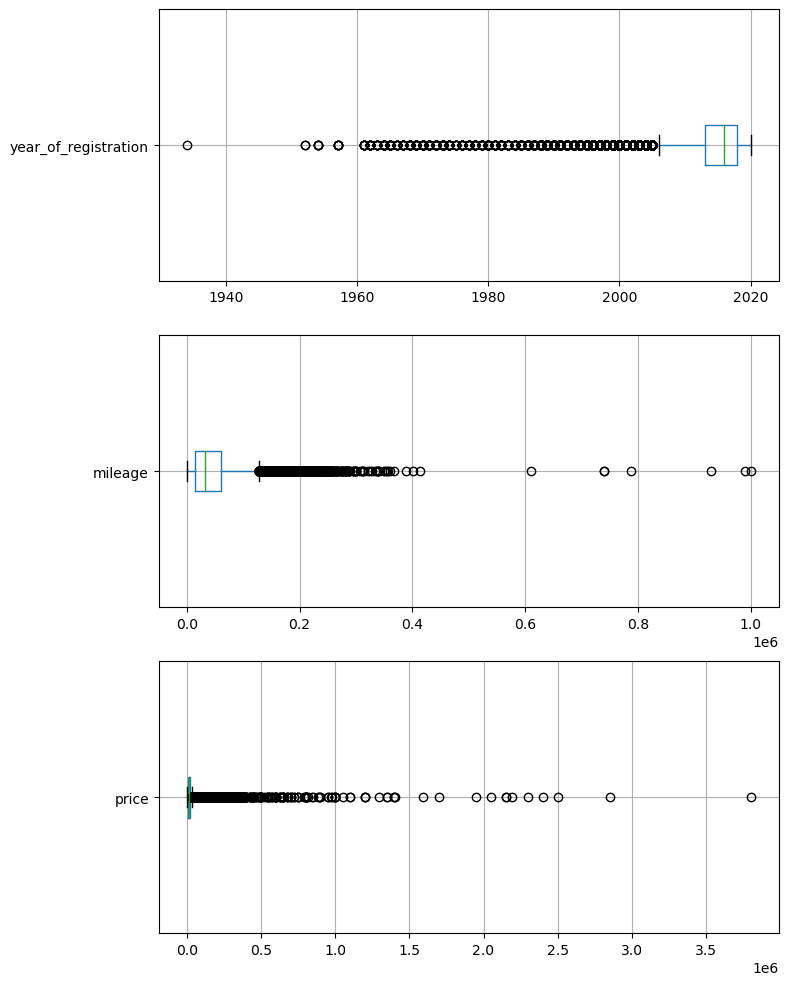

In [29]:
plt.figure(figsize=(8,12))

plt.subplot(3,1,1)
car_data.boxplot('year_of_registration', vert=False)

plt.subplot(3,1,2)
car_data.boxplot('mileage', vert=False)

plt.subplot(3,1,3)
car_data.boxplot('price', vert=False)
# plt.xscale('log');


At first glance, we can see that we have a really high amount of outliers in the data set.
- For year_of_registration, our data is negatively skewed and has a lot of outliers. 
- For mileage, our data is possitively skewed and has a lot of outliers.
-For price, our data is positively skewed and we have a lot of outliers also.

In [30]:
car_data.shape

(370401, 12)

In [31]:
def remove_outliers(df, column):

     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1
     df = df.loc[lambda df: ~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
     return df

In [32]:
# chain outlier removal on columns of interest
car_data = car_data.pipe(remove_outliers, 'mileage').pipe(remove_outliers, 'price').pipe(remove_outliers, 'year_of_registration')

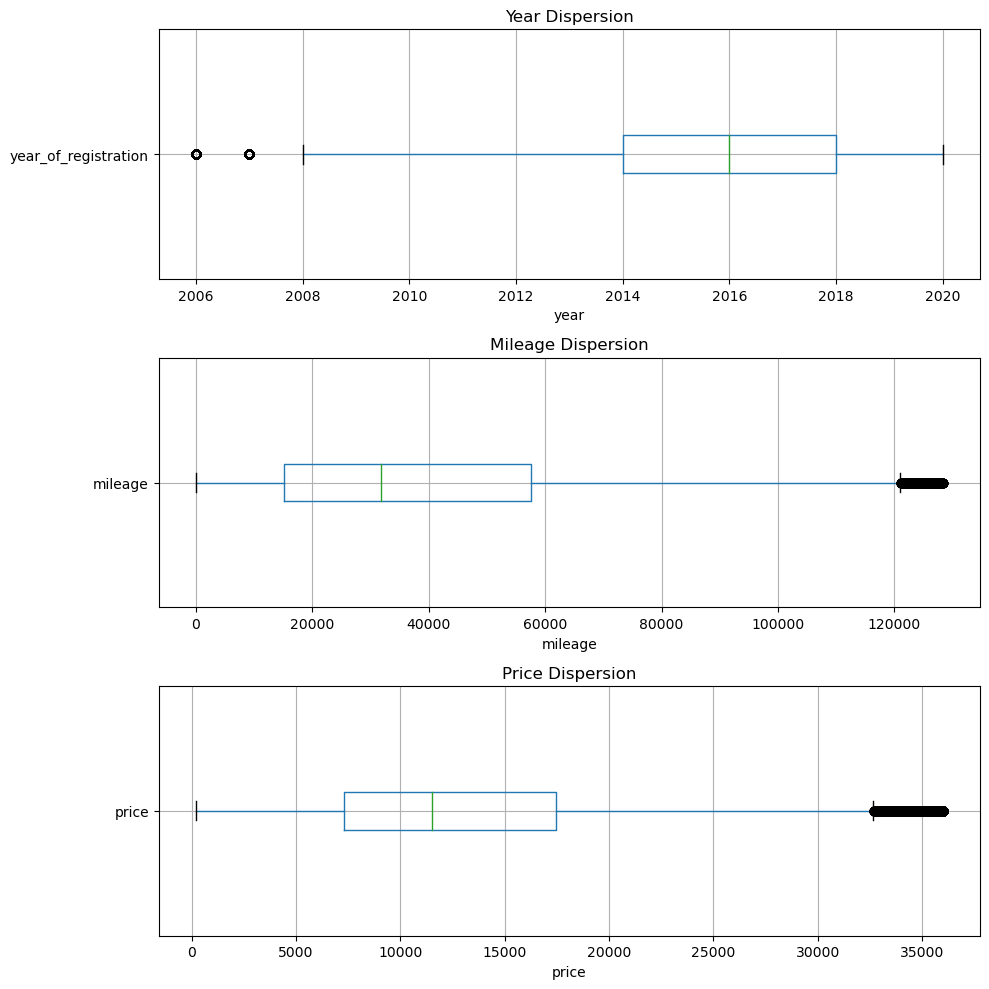

In [33]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
car_data.boxplot('year_of_registration', vert=False)
plt.xlabel('year')
plt.title('Year Dispersion')

plt.subplot(3,1,2)
car_data.boxplot('mileage', vert=False)
plt.xlabel('mileage')
plt.title('Mileage Dispersion')

plt.subplot(3,1,3)
car_data.boxplot('price', vert=False)
plt.xlabel('price')
plt.title('Price Dispersion')

plt.tight_layout()

In [34]:
# remove mileage less than 100
car_data = car_data[(car_data['mileage'] > 100) & (car_data['mileage'] < 121000)]

# remove car prices less than 500
car_data = car_data[(car_data['price'] > 499) & (car_data['price'] < 32500)]

#### Dealing with Outliers.

Since outliers are are values that are more than 1.5 times the IQR below the first quartile (Q1 - 1.5 * IQR) or above the third quartile (Q3 + 1.5 * IQR), we can write a function for removing outliers as;

Q1 = df[column].quantile(0.25)



     
     

Q3 = df[column].quantile(0.75)

IQR = Q3 - Q1

df = df.loc[lambda df: ~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

- The function "remove_outliers" is then used to do a chain removal of outliers on the year_of_registration, mileage and price columns.
- After removal of the outliers by appling interquartile range, we find that we still have a considerable amount of outliers present for mileage and price so we trim the data through visual inspection.

- For price, in order to reduce the outliers to a reasonable amount we trimmed the data set to include only values of cars greater than 499 pounds but less than 32,000 pounds because its quite uncommon to have cars priced below 500 pounds and cars above 32,500 pounds are outliers on the barchart from visual observation.

- For mileage, in order to reduce the outliers to a reasonable amount, we trimmed the data set to include only cars with a mileage greater that 100 miles but less than 121000 miles. This is because all the cars are used and must have some mileage. Also, acccording to our interpretation of mileage from the autotrader site the value for mileage is mileage per year and so 121,000 miles is a more reasonable upper value for a car's mileage in a year.

When we check our data distribution table again, we see that all the values for mileage, year_of_registration and price are more reasnable now and there are very little sign of outliers or abnormalites.

## Check feature importance through EDA

<AxesSubplot:>

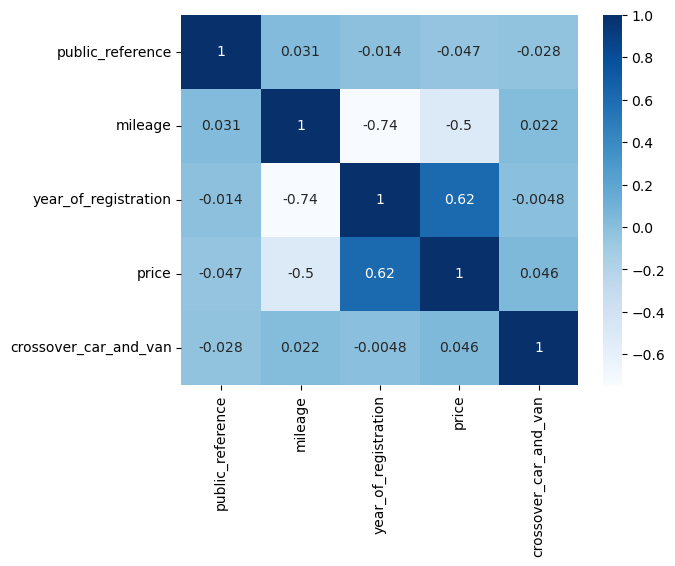

In [35]:
sns.heatmap(car_data.corr(), cmap='Blues', annot = True)

#### Checking for correlation between our features

1. There is a strong negative correlation between mileage and year_of_registration - This means that as the mileage increases, the year_of_registration reduces and vice versa.

2. There is a negative correlation between mileage and price - This means that as the mileage increases, the price reduces and vice versa.

3. There is a positive correlation between year_of_reegistration and price - This means that as the year_of_registration increases, the price increases and vice versa.

It looks like there are some interesting correlations between the price, mileage and year_of_registration features. Lets plot some more graphs to interrogate this further.

Text(0, 0.5, 'Price')

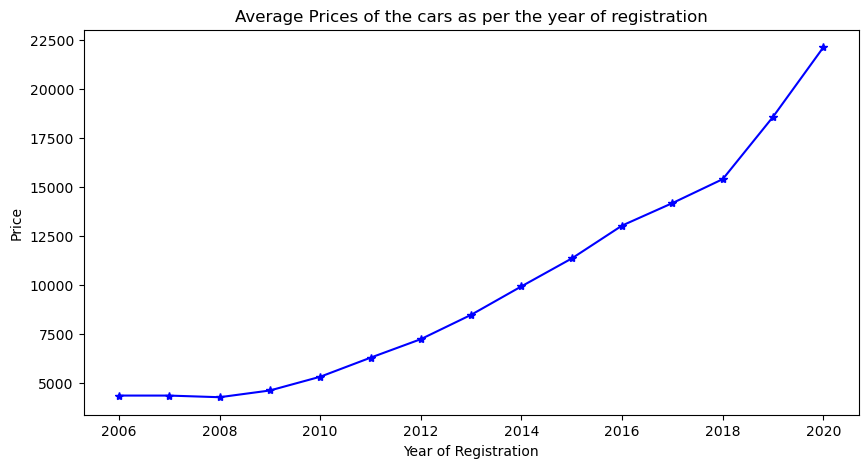

In [36]:
#Let us plot a graph to show the average prices of the cars as per the year_of_registration
car_data.groupby('year_of_registration')['price'].mean().plot(figsize=(10,5),marker='*',color='b')
plt.title("Average Prices of the cars as per the year of registration");


plt.title('Average Prices of the cars as per the year of registration')
plt.xlabel('Year of Registration')
plt.ylabel('Price')

#### Relationship between year_of _registration and price
Just like we observed in the heatmap, where we saw a positive correlation between price and year_of_registration. 
It appears that the average price of cars increases as the year_of_registration increases.

- This means that the more recent the year of registration of a car, the higher the cost of the car.
- This indicated that year of registration is a good predictor of price but lets plot more graphs to see if we have any other relationships that are stronger.

Text(0, 0.5, 'Average Mileage')

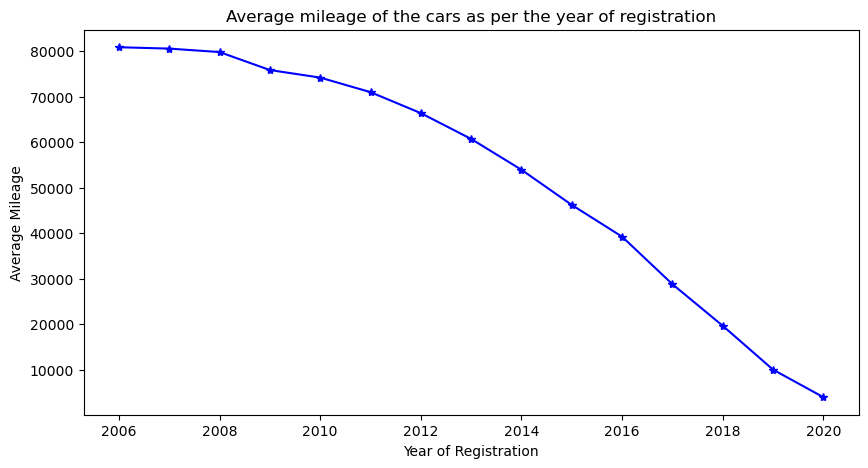

In [37]:
#Let us plot a graph to show the average mileage of the cars as per the year_of_registration
car_data.groupby('year_of_registration')['mileage'].mean().plot(figsize=(10,5),marker='*',color='b')
plt.title("Average mileage of the cars as per the year of sales");

plt.title('Average mileage of the cars as per the year of registration')
plt.xlabel('Year of Registration')
plt.ylabel('Average Mileage')

#### Average mileage of the cars as per the year of registration
Just like we observed in the heatmap, where we saw a negative correlation between mileage and year_of_registration.
- It appears that the average mileage of cars reduces as the year_of_registration increases - This means that the more recent the year of registration of a car, the lower the average mileage of the car.
- This means that the average mileage of more recent cars is lower and this could be as a result of people changing their cars more frequently over the years. 

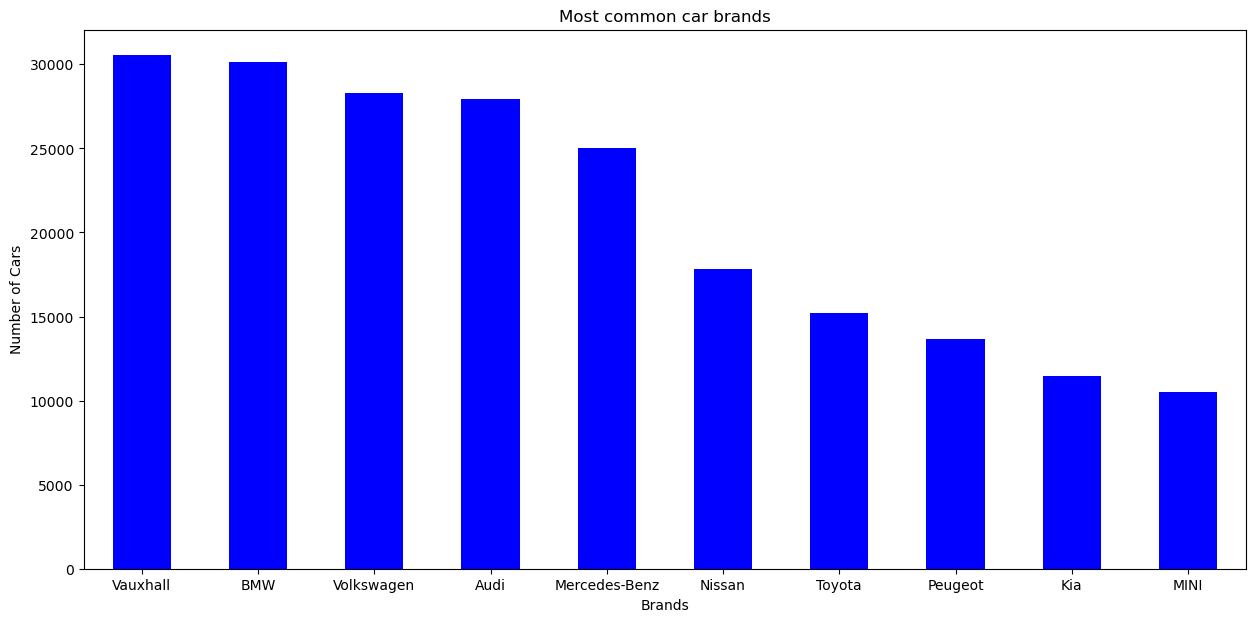

In [38]:
plt.figure(figsize=(15,7))
car_data.standard_make.value_counts()[:10].plot(kind='bar', color='b')

plt.title('Most common car brands')
plt.xlabel('Brands')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0);

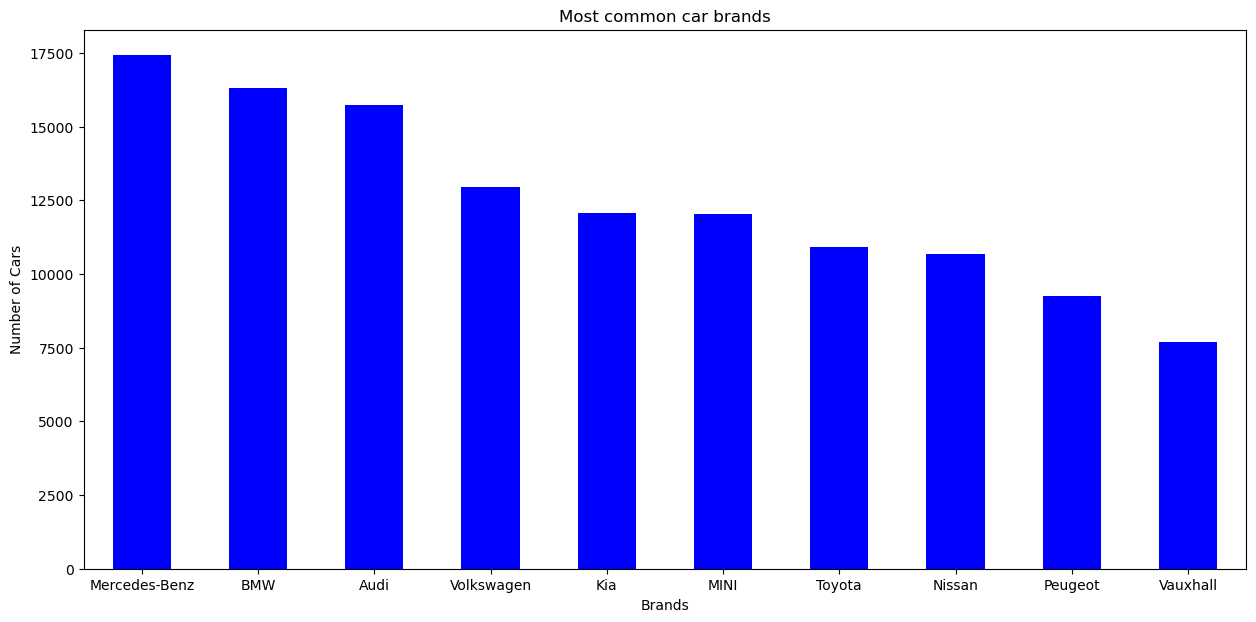

In [39]:
# find 10 most frequent standard_make
most_frequent_10 = car_data['standard_make'].value_counts().nlargest(10).index

# filter dataframe by most frequent standard_make
most_frequent_df = car_data[car_data['standard_make'].isin(most_frequent_10)]

# calculate average price for each standard_make
average_price_df = most_frequent_df.groupby('standard_make')['price'].mean().sort_values(ascending=False)

# plot the standard_make against the average price
plt.figure(figsize=(15,7))
average_price_df.plot(kind='bar', color='b')

plt.title('Most common car brands')
plt.xlabel('Brands')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0);


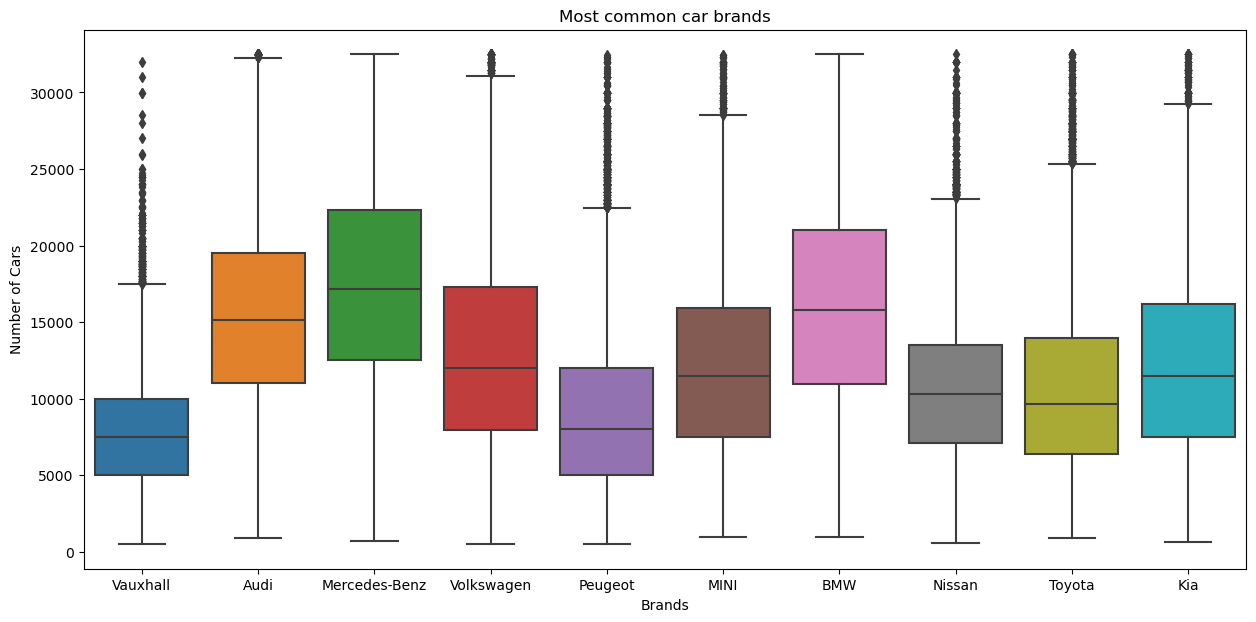

In [40]:
most_frequent_10 = car_data['standard_make'].value_counts().nlargest(10).index

# filter dataframe by most frequent standard_make
most_frequent_df = car_data[car_data['standard_make'].isin(most_frequent_10)]

# plot price for each group
plt.figure(figsize=(15,7))
sns.boxplot(x='standard_make', y='price', data=most_frequent_df)

plt.title('Most common car brands')
plt.xlabel('Brands')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0);

#### Most common car brands
1. In the first plot of most common cars, we can see that Vauxhall is the most common brand.
2. In the second plot for most common cars, which compares the mean of the prices of the most common cars, we can see that Vauxhall is the cheapest car brand.
3. In the third plot for most common cars, the majority of the cars sold by Vauxhall fall below the 50th percentile and are generally lower than all the other brands. 

This may imply that Vauxhall is preffered by most people because of its cheaper prices and so it is purchased more.
We can conclude that for some cars the brand of the car is sometimes a good predictor of price.

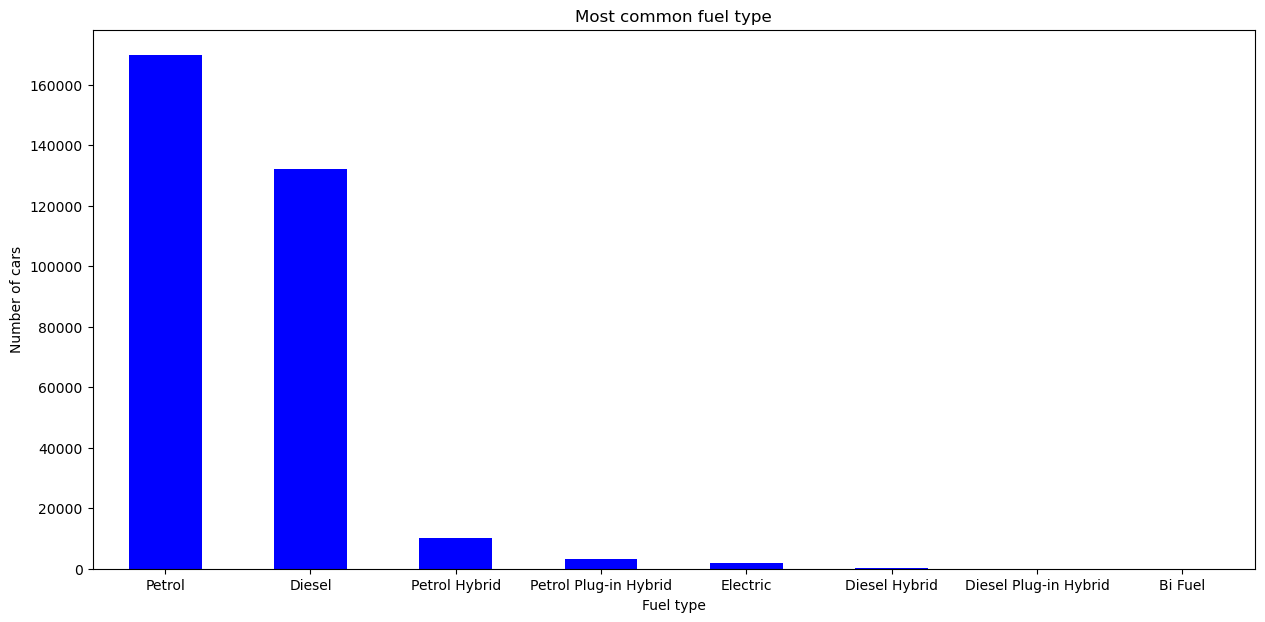

In [41]:
plt.figure(figsize=(15,7))
car_data.fuel_type.value_counts()[:10].plot(kind='bar', color='b')

plt.title('Most common fuel type')
plt.xlabel('Fuel type')
plt.ylabel('Number of cars')
plt.xticks(rotation=0);

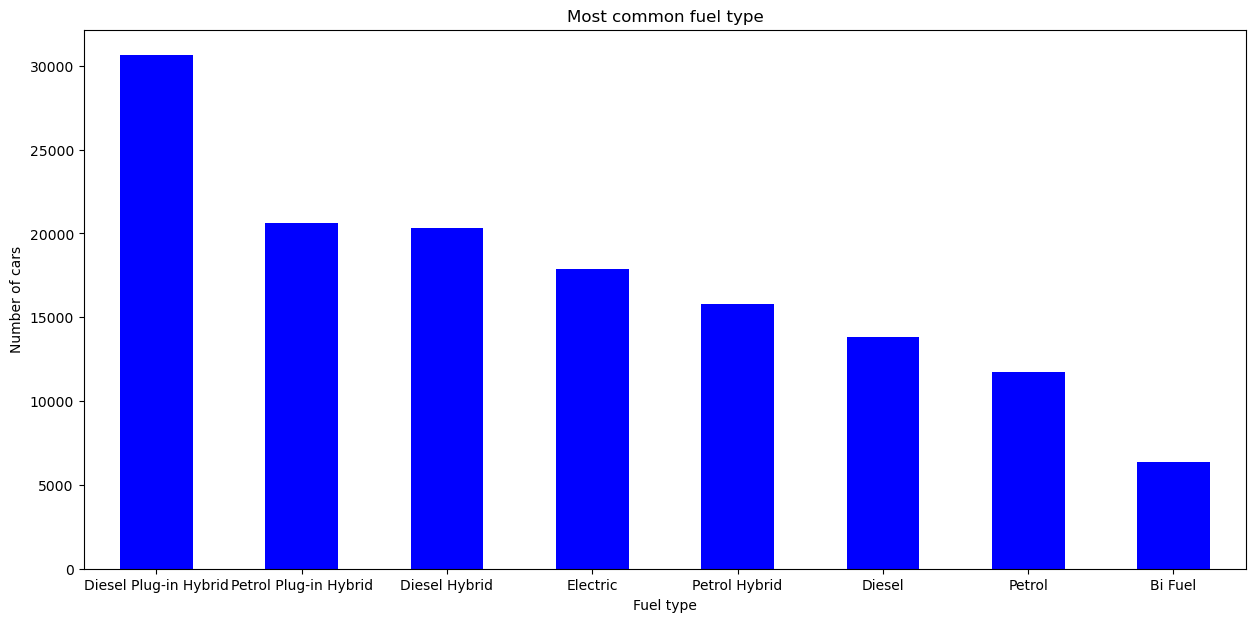

In [42]:
# find 10 most frequent fuel_type
most_frequent_10_fuel = car_data['fuel_type'].value_counts().nlargest(10).index

# filter dataframe by most frequent fuel_type
most_frequent_fuel = car_data[car_data['fuel_type'].isin(most_frequent_10_fuel)]

# calculate average price for each fuel_type
average_price_df = most_frequent_df.groupby('fuel_type')['price'].mean().sort_values(ascending=False)

# plot the fuel_type against the average price
plt.figure(figsize=(15,7))
average_price_df.plot(kind='bar', color='b')

plt.title('Most common fuel type')
plt.xlabel('Fuel type')
plt.ylabel('Number of cars')
plt.xticks(rotation=0);

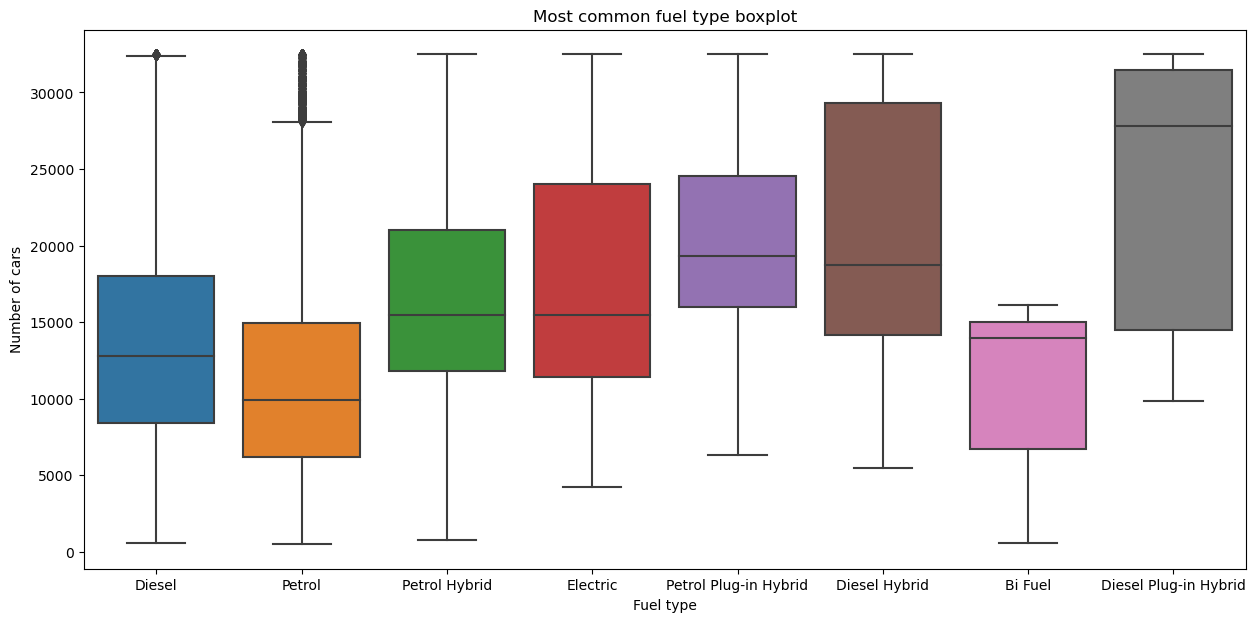

In [43]:
# plot price for each group
plt.figure(figsize=(15,7))
sns.boxplot(x='fuel_type', y='price', data=most_frequent_fuel)

plt.title('Most common fuel type boxplot')
plt.xlabel('Fuel type')
plt.ylabel('Number of cars')
plt.xticks(rotation=0);

#### Most common fuel type and Price
For petrol
- In the first plot of most common fuel type, we can see that petrol is the most common fuel type.
- In the second plot for most common fuel type, which compares the mean of the prices of the most fuel type, we can see that petrol-powered cars are the second cheapest fuel type.
- In the third plot for most fuel type, the majority of the cars sold with petrol fall below the 50th percentile and are generally lower than all the other fuel types.
- This may imply that petrol is preferred by most people because of its cheaper prices and so it is purchased more. We can conclude that for some cars the fuel type is sometimes a good predictor of price.

On the other hand for Bi-fuel
- In the first plot of most common fuel type, we can see that Bi-fuel is the least common fuel type.
- In the second plot for most common fuel type, which compares the mean of the prices of the most fuel type, we can see that bi-fuel powered cars are the cheapest fuel type.
- In the third plot for most fuel type, the majority of the cars sold with Bifuel fall below the above the 75th percentile and are generally lower than all the other fuel types but generally higher than petrol cars.
- This implies that although bi-fuel is as cheap as petrol, the cars are generally more expensive than petrol.

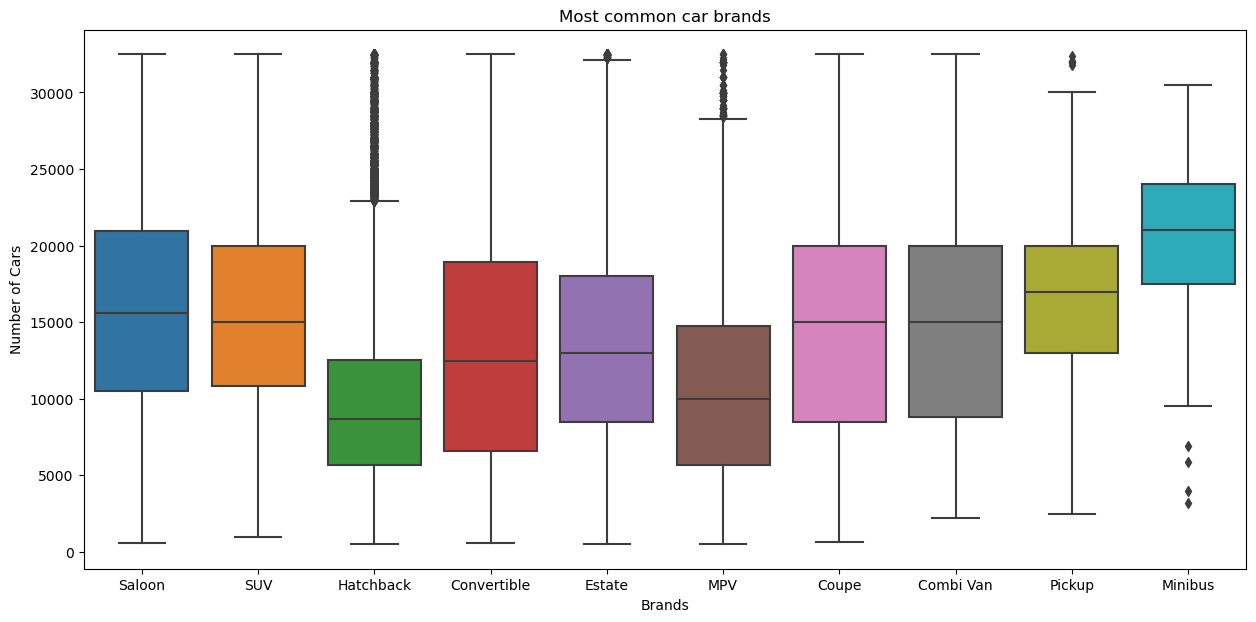

In [44]:
most_frequent_10_model = car_data['body_type'].value_counts().nlargest(10).index

# filter dataframe by most frequent standard_make
most_frequent_df_model = car_data[car_data['body_type'].isin(most_frequent_10_model)]

# plot price for each group
plt.figure(figsize=(15,7))
sns.boxplot(x='body_type', y='price', data=most_frequent_df_model)

plt.title('Most common car brands')
plt.xlabel('Brands')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0);

In [45]:
model_as_predictor = car_data[(car_data['body_type'] == 'Hatchback')]
model_as_predictor

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel
5,202007080998445,24075.0,17,Red,Vauxhall,Viva,USED,2017,5861,Hatchback,False,Petrol
10,202007161303602,24487.0,17,Black,Peugeot,208,USED,2017,8795,Hatchback,False,Petrol
12,202009234108830,18214.0,19,Silver,SEAT,Leon,USED,2019,14290,Hatchback,False,Petrol
13,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017,19000,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
370392,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015,5000,Hatchback,False,Petrol
370395,202010315651841,74732.0,59,Blue,Toyota,Auris,USED,2009,2600,Hatchback,False,Petrol
370396,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019,10595,Hatchback,False,Petrol
370397,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009,2000,Hatchback,False,Petrol


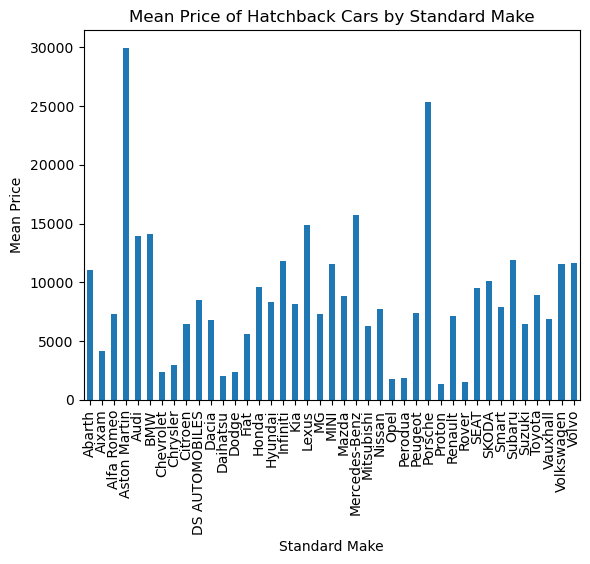

In [46]:
grouped_data = model_as_predictor.groupby('standard_make')['price'].mean()

# Plot the grouped data as a bar chart
grouped_data.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Standard Make')
plt.ylabel('Mean Price')
plt.title('Mean Price of Hatchback Cars by Standard Make')

# Show the plot
plt.show()

In [47]:
model_as_predictor_s = car_data[(car_data['body_type'] == 'Saloon')]
model_as_predictor_s

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel
9,202007151278313,77000.0,60,Grey,Volkswagen,Passat,USED,2010,4499,Saloon,False,Diesel
16,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012,9495,Saloon,False,Petrol
43,202006190295448,37000.0,66,Grey,BMW,7 Series,USED,2016,30995,Saloon,False,Diesel
54,202007241637926,85608.0,15,Red,Audi,S4,USED,2015,16000,Saloon,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
370367,202010285515718,100000.0,59,Silver,BMW,3 Series,USED,2010,4395,Saloon,False,Diesel
370368,202010285527271,22153.0,18,Blue,Mercedes-Benz,C Class,USED,2018,20800,Saloon,False,Diesel
370373,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017,18499,Saloon,False,Diesel
370377,202010295566726,30444.0,17,Black,BMW,4 Series Gran Coupe,USED,2017,18990,Saloon,False,Diesel


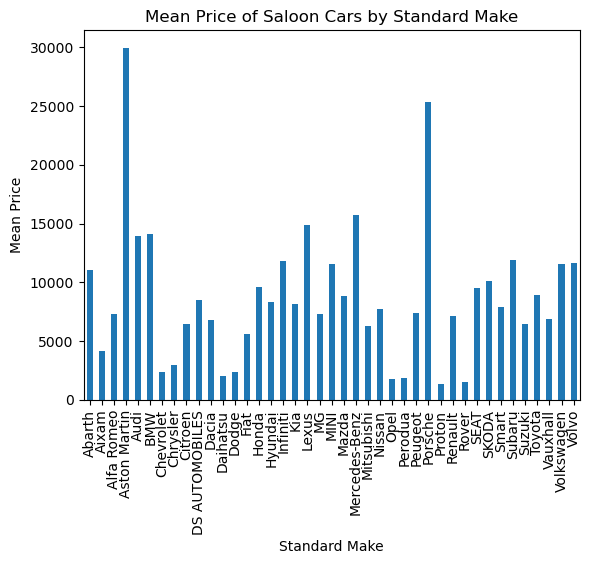

In [48]:
grouped_data_2 = model_as_predictor_s.groupby('standard_make')['price'].mean()

# Plot the grouped data as a bar chart
grouped_data.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Standard Make')
plt.ylabel('Mean Price')
plt.title('Mean Price of Saloon Cars by Standard Make')

# Show the plot
plt.show()

#### Bodytype as a predictor of price
- There are about 25,000 Hatchback cars are Vauxhall cars and this implies that body_type might be a relationship  of price accross a particular brand of cars. This also shows that body_type may be a good predictor of price.
- The boxplot for the body_type, standard_make and fuel_type to subset data of Vauxhall cars (the cheapest cars) in each of the features and they all retured at least 10,000 values meaning that the all predicted Vauxhall as a cheap car. 
- I believe this shows that body_type, standard_make and fuel_type have relationships with price that may be used to predict price.

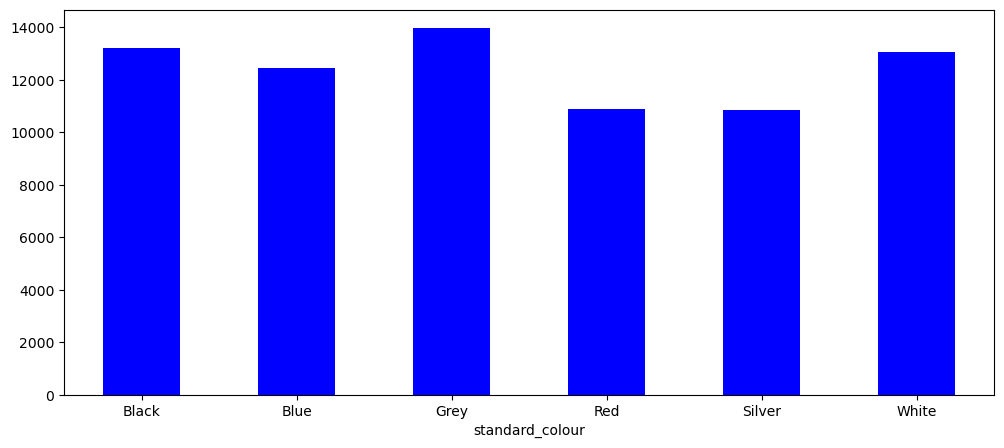

In [49]:
most_common_colours = car_data.groupby('standard_colour').size().sort_values(ascending = False)[:6].index.to_list()

popular_colours = car_data[car_data['standard_colour'].isin(most_common_colours)]
                 
plt.figure(figsize=(12,5))
popular_colours.groupby('standard_colour')['price'].mean().plot(kind='bar', color = 'b')
plt.xticks(rotation=0);


In [50]:
car_data.nunique()

public_reference         317688
mileage                   75753
reg_code                     47
standard_colour              22
standard_make                73
standard_model              747
vehicle_condition             1
year_of_registration         15
price                     17470
body_type                    16
crossover_car_and_van         2
fuel_type                     8
dtype: int64

In [51]:
most_common_body = car_data['body_type'].value_counts()[:6].index.to_list()

popular_body = car_data[car_data['body_type'].isin(most_common_body)]

In [52]:
fuel_type = list(popular_body.fuel_type.unique())

body_type = list(popular_body.body_type.unique())

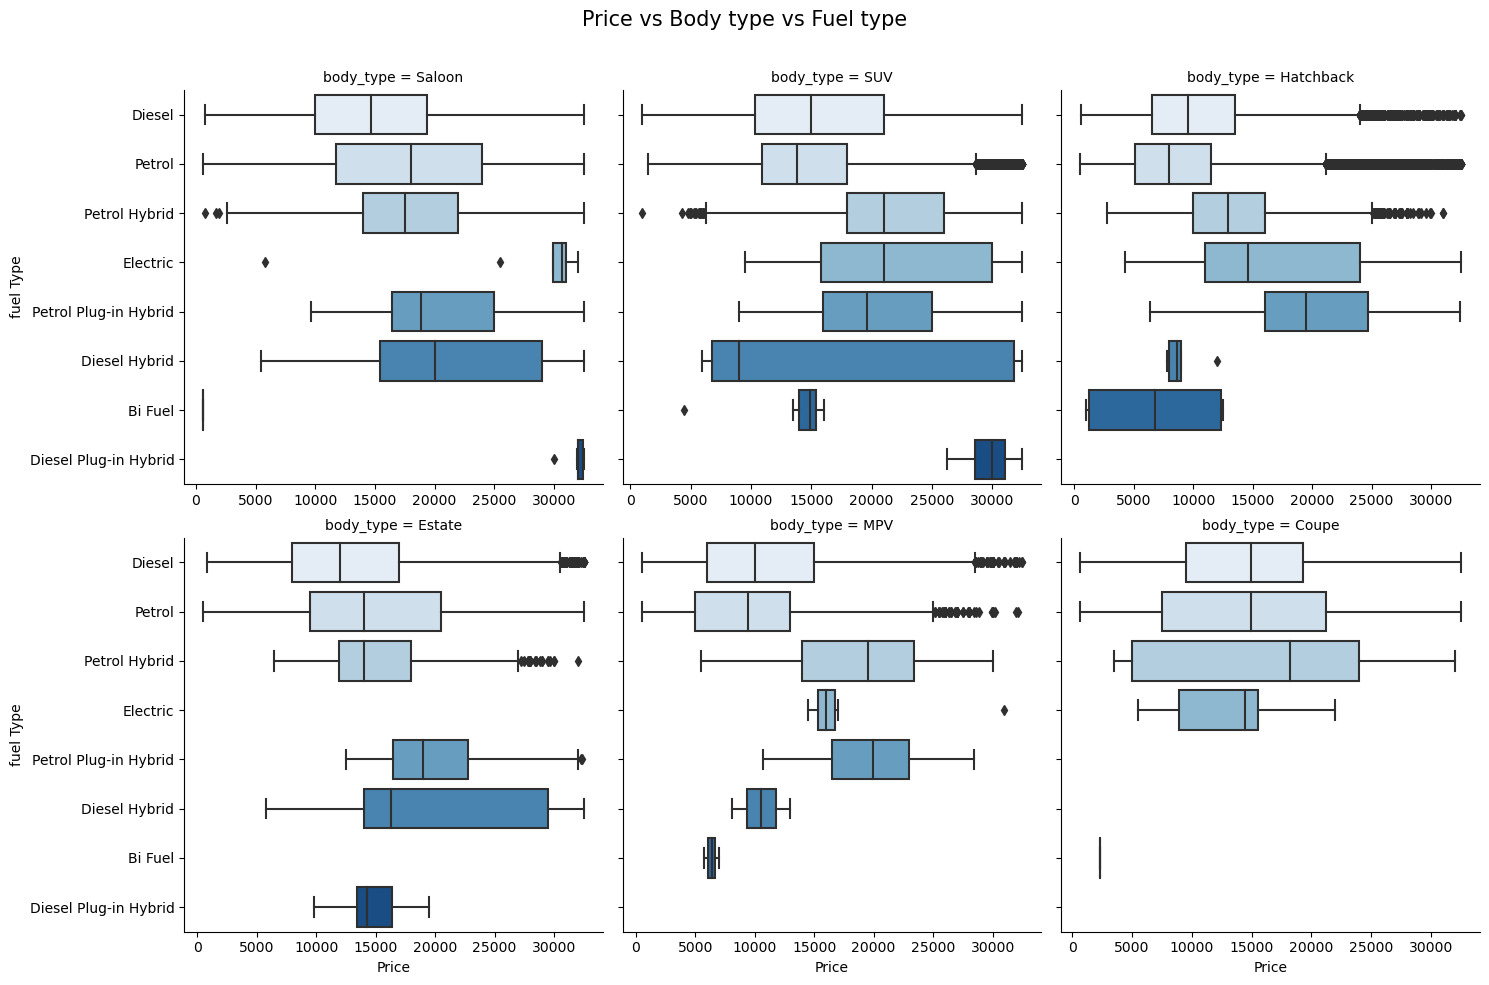

In [53]:
g = sns.FacetGrid(popular_body, col='body_type', col_wrap=3, col_order=body_type,sharex=False, height=5)
g.map(sns.boxplot, 'price','fuel_type',  palette='Blues', order=fuel_type)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Price vs Body type vs Fuel type', fontsize=15)
g.set_ylabels('fuel Type')
g.set_xlabels('Price');

## Preparing data for modeling

In [54]:
car_data_ml = car_data.copy()

In [55]:
# List of categorical features
categorical_features = [cat for cat in car_data_ml.columns if str(car_data_ml[cat].dtype) == 'object']
categorical_features

['reg_code',
 'standard_colour',
 'standard_make',
 'standard_model',
 'vehicle_condition',
 'body_type',
 'fuel_type']

### Encoding the data using ordinal ecoding

In [56]:
ordinal_encoder = OrdinalEncoder()
car_data_ml[categorical_features] = ordinal_encoder.fit_transform(car_data_ml[categorical_features])
car_data_ml.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202007020778260,108230.0,27.0,2.0,31.0,710.0,0.0,2011,7000,14.0,False,1.0
1,202007020778474,7800.0,15.0,8.0,59.0,720.0,0.0,2017,14000,13.0,False,5.0
2,202007080986776,45000.0,14.0,4.0,68.0,439.0,0.0,2016,7995,7.0,False,1.0
3,202007161321269,64000.0,30.0,8.0,34.0,532.0,0.0,2015,26995,13.0,False,1.0
4,202009304412074,16000.0,15.0,2.0,5.0,557.0,0.0,2017,29000,4.0,False,5.0


A copy of the cleaned data set was created in preparation for modelling. Next was an attempt at encoding with label encoding (one-hot encoding ) which seemed to be ineffective and cause some issues due to the sheer volume of additional features (columns) created by the one-hot encoding method, this made running some algorithms take ages and so an alternative method was sought after.
In order to prevent those issues, research was done to find alternative encoding techniques on stack-overflow. Ordinal encoding was selected and used. It proved to be far more efficient considering the high number of parameters in the standard_colour, reg_code, standard_make and standard model columns.
It's important to keep in mind that ordinal encoding assumes an order or ranking between the categories and this may lead to some bias. To prevent this the performance of the 3 models that were built were compared. When one-hot encoding was used, linear regression had an r2 score of about 0.88 accuracy, lasso had about 0.86 and random forrest had about 0.92. When ordinal encoding was used, linear regression had an r2 score of about 0.50 accuracy, lasso had about 0.50 and random forrest had about 0.92.
This indicated that while ordinal encoding had lower accuracy for the linear regression and lasso models, it was quite accurate for random forrest giving the same r2 score of about 0.92. Due to this reason, ordinal encoding was selected.

### Splitting data
Seperate model features from ground truth

In [57]:
X = car_data_ml[[x for x in car_data_ml.columns if x not in ['price']]]
y = car_data_ml[['price']]
print('Features:', X.columns, '\nGround Truth:', y.columns)

Features: Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object') 
Ground Truth: Index(['price'], dtype='object')


In [58]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

## Building Models

#### First let's try Linear Regression
Linear Regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. Reference - [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

In [59]:
# creating an object of LinearRegression class
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 3812.4307361171886
Mean Squared Error: 24482537.12588279
Root Mean Squared Error: 4947.983137186584
R Squared: 0.5012706233785555


#### Model performance evaluation

In [60]:
coeff_df = pd.DataFrame(linearRegression.coef_.flat, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
public_reference,-1.629535e-08
mileage,-5.029762e-02
reg_code,1.490343e+01
standard_colour,-4.716313e+01
standard_make,-6.115831e+01
standard_model,1.630733e+00
vehicle_condition,-1.460876e-11
year_of_registration,9.720935e+02
body_type,3.504337e+02
crossover_car_and_van,5.537058e+03


In [61]:
df_compare = pd.DataFrame({'Actual': y_test['price'].to_numpy(), 'Predicted': y_pred.flat})
df_compare

,Actual,Predicted
0,21995,19352.232425
1,6291,10947.362469
2,12995,12474.444911
3,7000,7785.884082
4,8779,13318.159464
...,...,...
104833,16000,15970.777569
104834,25999,16020.410963
104835,16950,15002.219968
104836,26500,19852.082478


The linear regression model seems not to be a very accurate model for this data set, so let's try something else.

#### Next let's try Lasso model
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.
Lasso was originally formulated for linear regression models. This simple case reveals a substantial amount about the estimator. These include its relationship to ridge regression and best subset selection and the connections between lasso coefficient estimates and so-called soft thresholding. It also reveals that (like standard linear regression) the coefficient estimates do not need to be unique if covariates are collinear. Reference - [Wikepedia](https://en.wikipedia.org/wiki/Lasso_(statistics))

In [62]:
# Lasso
# model instatiation
lasso = Lasso()
lasso.fit(X_train, y_train)
l_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, l_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, l_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, l_pred)))
print('R Squared:', r2_score(y_test, l_pred))

Mean Absolute Error: 3812.340704292968
Mean Squared Error: 24481349.311991654
Root Mean Squared Error: 4947.8631056236445
R Squared: 0.5012948201224805


In [64]:
coeff_df_l = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
coeff_df_l

,Coefficient
public_reference,-1.632401e-08
mileage,-5.029992e-02
reg_code,1.488630e+01
standard_colour,-4.714013e+01
standard_make,-6.113857e+01
standard_model,1.632262e+00
vehicle_condition,0.000000e+00
year_of_registration,9.719904e+02
body_type,3.504000e+02
crossover_car_and_van,5.223991e+03


In [65]:
df_compare_l = pd.DataFrame({'Actual': y_test['price'].to_numpy(), 'Predicted': l_pred.flat})
df_compare_l

,Actual,Predicted
0,21995,19352.723388
1,6291,10947.600525
2,12995,12476.058215
3,7000,7789.360241
4,8779,13319.709223
...,...,...
104833,16000,15972.924136
104834,25999,16020.252576
104835,16950,15004.123346
104836,26500,19852.965333


The lasso model also seems not to be a very accurate model for this data set, so let's try something else still

#### Lets try Random Forest Model building

Random Forest is a highly utilized model, it is an ensemble learning technique that creates multiple decision trees during the training process and uses the mode of the classes or mean prediction of the individual trees for classification or regression tasks respectively. Reference: [Wikipedia](https://en.wikipedia.org/wiki/Random_forest)

In [67]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
r_pred = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, r_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, r_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, r_pred)))
print('R Squared:', r2_score(y_test, r_pred))

Mean Absolute Error: 1290.0799635872543
Mean Squared Error: 3659778.3006415423
Root Mean Squared Error: 1913.0547040379013
R Squared: 0.9254473120548437


In [72]:
#Making predictions random forest
df_compare_rf = pd.DataFrame({'Actual': y_test['price'].to_numpy(), 'Predicted': r_pred.flat})
df_compare_rf

,Actual,Predicted
0,21995,24102.64
1,6291,6204.74
2,12995,14473.35
3,7000,8912.29
4,8779,9500.12
...,...,...
104833,16000,18277.18
104834,25999,24133.95
104835,16950,18033.65
104836,26500,26858.91


💥💥💥💥 Oh Yeah!!!!
That's Great Accuracy
The linear regression model seems an accurate model for this data set, so let's take a deeper look at our results.

The Mean Absolute Error (MAE) is a measure of how close the model's predictions are to the true values. A lower value of MAE indicates that the model is performing better. The MAE value of 1290.0799635872543 means that the model's predictions are on average 1290.0799635872543 away from the true values.

The Mean Squared Error (MSE) is another measure of how well the model is performing. It is similar to MAE, but it squares the difference between the predicted and true values before taking the average. A lower value of MSE also indicates that the model is performing better. The MSE value of 3659778.3006415423 means that the model's predictions are on average 3659778.3006415423 away from the true values.

The Root Mean Squared Error (RMSE) is the square root of the MSE. It is a measure of how far the model's predictions deviate from the true values. A lower value of RMSE indicates that the model is performing better. The RMSE value of 1913.0547040379013 means that the model's predictions are on average 1913.0547040379013 away from the true values.

The R Squared (R^2) is a measure of how well the model explains the variance of the data. It ranges from 0 to 1, where 1 is a perfect fit. The R^2 value of 0.9254473120548437 means that 92.54% of the variance of the data is explained by the model.

## Grid search
Next lets perform a grid search test to find the optimal parameter values and see if the model can be improved.

In [73]:
param_grid = {
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6]
}

In [74]:
grid = GridSearchCV(
        RandomForestRegressor(),
        param_grid,
        scoring='neg_root_mean_squared_error',
        return_train_score=True
)

In [75]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [76]:
grid_pred = grid.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))
print('R Squared:', r2_score(y_test, grid_pred))

Mean Absolute Error: 1279.2362455116697
Mean Squared Error: 3601192.9719011234
Root Mean Squared Error: 1897.6809457601464
R Squared: 0.9266407432883648


In [77]:
pd.DataFrame(grid.cv_results_).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,50.845496,0.783709,1.986472,0.191897,1,2,"{'min_samples_leaf': 1, 'min_samples_split': 2}",-1947.140909,-1975.978325,-1941.266868,...,-1954.001795,19.275695,9,-731.446743,-730.955823,-733.084393,-732.16598,-733.249851,-732.180558,0.894313


In [78]:
results = pd.DataFrame(grid.cv_results_, 
             columns=['param_min_samples_leaf','param_min_samples_split','mean_test_score','mean_train_score','rank_test_score']
            )

In [79]:
results.sort_values(by='rank_test_score')

,param_min_samples_leaf,param_min_samples_split,mean_test_score,mean_train_score,rank_test_score
2,1,6,-1937.063469,-1023.320577,1
5,2,6,-1944.261646,-1134.144793,2
1,1,4,-1946.237724,-876.482691,3
3,2,2,-1948.794457,-1026.135067,4
4,2,4,-1951.345109,-1026.716332,5
6,3,2,-1952.465316,-1235.512233,6
7,3,4,-1952.873474,-1235.806506,7
8,3,6,-1953.658234,-1236.056312,8
0,1,2,-1954.001795,-732.180558,9


In [98]:
grid_retrain = RandomForestRegressor(min_samples_leaf=3, min_samples_split=2,random_state=100)
grid_retrain.fit(X_train, y_train)
grid_retrain_predictions = grid_retrain.predict(X_test)

In [81]:
print(f"train score:{grid_retrain.score(X_train,y_train)}")
print(f"test scpre{grid_retrain.score(X_test, y_test)}")
print(f"Mean absolute error: {mean_absolute_error(y_test,grid_retrain_predictions)}")
print(f"Mean squared error: {mean_squared_error(y_test,grid_retrain_predictions)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,grid_retrain_predictions))}")
print(f"R Squared: {r2_score(y_test,grid_retrain_predictions)}")

train score:0.9790913076265721
test scpre0.9259010372690037
Mean absolute error: 1282.1939912084308
Mean squared error: 3637505.0099124555
RMSE: 1907.2244256805373
R Squared: 0.9259010372690037


When comparing the results from the random forest to the grid search, we can see that both models have similar performance. The train score of 0.9790913076265721 and test score of 0.9259010372690037 from grid search indicates that the model is performing well on both the training set and the testing set. The MAE, MSE and RMSE values are also very similar between the two models and R Squared values are also same. So, both models are performing well.

#### Lets hheck how important each feature was in predicting price to our model

In [112]:
Feature_importance = grid_retrain.feature_importances_.tolist()

In [113]:
Features = grid_retrain.feature_names_in_.tolist()

<AxesSubplot:>

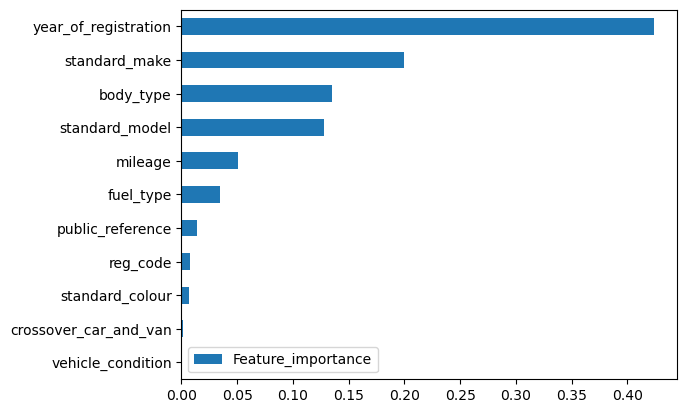

In [116]:
pd.DataFrame(Feature_importance, features,columns=['Feature_importance']).sort_values(by='Feature_importance',ascending=True).plot.barh()

### Visualization of the random forrest model

To make sure our model is accurate, we check through visualisation.

source: https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

In [85]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions.flat})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results


In [86]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


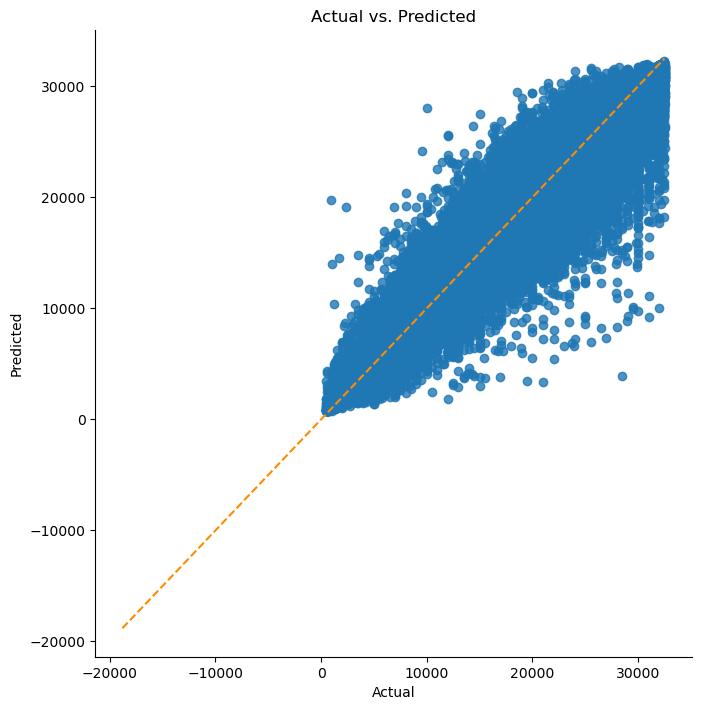

In [87]:
linear_assumption(rf, X, y['price'].to_numpy())

We can see a relatively even spread around the diagonal line.

Assumption satisfiedm

### Normality of the Error Terms

This assumes that the error terms of the model are normally distributed.

In [118]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')


### Homoscedasticity

This assumes homoscedasticity, which is the same variance within our error terms. 

In [91]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


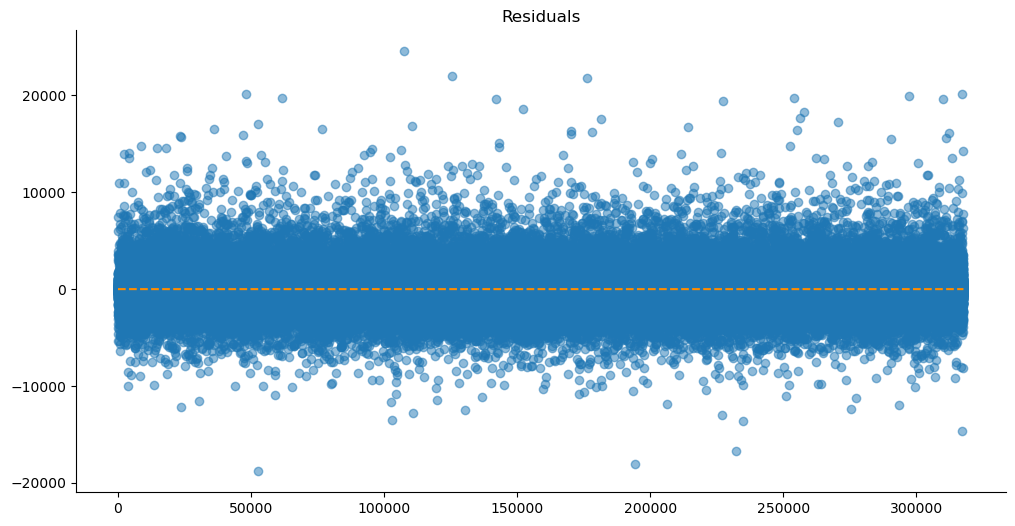

In [92]:
homoscedasticity_assumption(rf, X, y['price'].to_numpy())

There don’t appear to be any obvious problems with the variance across our residuals.

Assumption satisfied

### No Autocorrelation of the Error Terms

This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

In [93]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')


In [117]:
autocorrelation_assumption(rf, X, y['price'].to_numpy())

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.00050532672248
Little to no autocorrelation 

Assumption satisfied


In [ ]:
So, Finally this NoteBook Ends here 🤵🏻